<a href="https://colab.research.google.com/github/junghc801/AstroData/blob/main/Project_%233/GravitationalWave_GW190521_074359.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip install gwpy # python package for gravitational wave

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 1.8 MB/s eta 0:00:00
  Created wheel for ligo-segments: filename=ligo_segments-1.4.0-cp310-cp310-linux_x86_64.whl size=99224 sha256=c409cd1597f5d74c9514bd2e735e1be39a8a180deafccb0d8cf613fdcf78f063
  Stored in directory: /root/.cache/pip/wheels/6d/48/d1/3466977be4e41ba57f92ad0d5619f083df43cf319a151c4e06
Successfully built ligo-segments


The following example is from: https://gwpy.github.io/docs/stable/examples/signal/gw150914/

In [3]:
# # -- Set a GPS time:
t0 = 1242459857.5    # -- GW190521_074359

from gwpy.timeseries import TimeSeries # import library for data
hdata = TimeSeries.fetch_open_data('H1', t0 - 16, t0 + 16) # data from Hanford

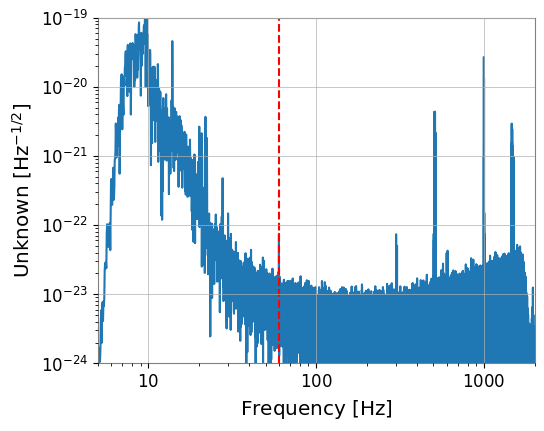

In [4]:
import matplotlib.pyplot as plt # import library for plot

# -- Plot ASD
fig2 = hdata.asd().plot() # plotting
plt.xlim(5,2000)        # domain = [5,2000]
ymin = 1e-24         # y lower bound
ymax = 1e-19        # y upper bound
plt.ylim(ymin, ymax)    # set range
plt.vlines(60, ymin, ymax, linestyle="dashed", color="red") # vertical line when x = 60

In [5]:
from gwpy.signal import filter_design # import library fto filter signal
bp = filter_design.bandpass(50, 250, hdata.sample_rate) # limit the range between 50 and 250

notches = [filter_design.notch(line, hdata.sample_rate) for
           line in [60]]  # notch when 60

zpk = filter_design.concatenate_zpks(bp, *notches) # create a single zpk

hfilt = hdata.filter(zpk, filtfilt=True) # filter data


In [6]:
hdata = hdata.crop(*hdata.span.contract(1)) # discard unnecessary data
hfilt = hfilt.crop(*hfilt.span.contract(1))      # discard unnecessary data

In [7]:
print(*hdata.span.contract(1))

1242459843.5 1242459871.5


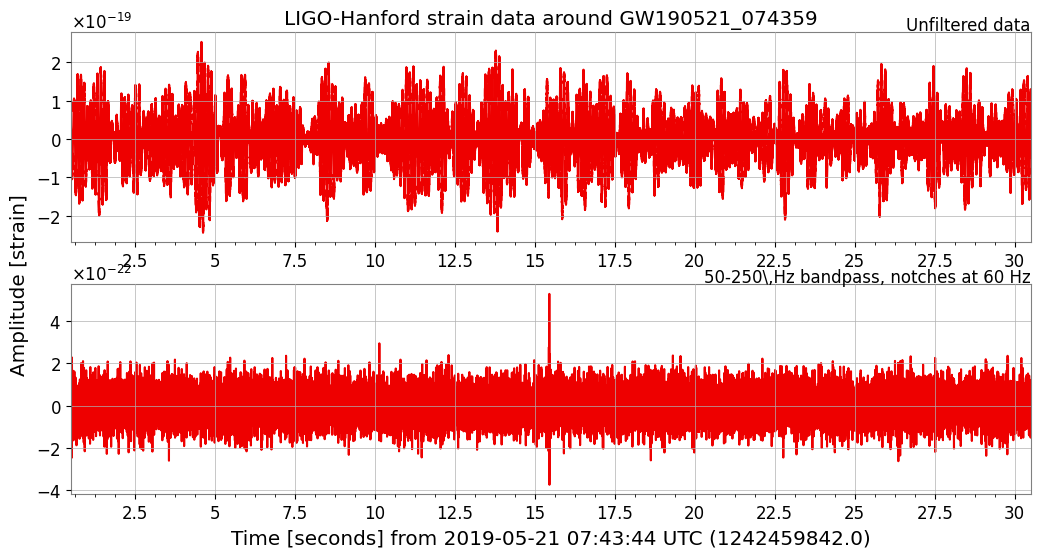

In [8]:
from gwpy.plot import Plot # import library for plot
plot = Plot(hdata, hfilt, figsize=[12, 6], separate=True, sharex=True,
            color='gwpy:ligo-hanford')  # plot the original and filtered data
ax1, ax2 = plot.axes    # assign axes
ax1.set_title('LIGO-Hanford strain data around GW190521_074359') # add plot title
ax1.text(1.0, 1.01, 'Unfiltered data', transform=ax1.transAxes, ha='right') # add annotation
ax1.set_ylabel('Amplitude [strain]', y=-0.2) # y label
ax2.set_ylabel('')
ax2.text(1.0, 1.01, r'50-250\,Hz bandpass, notches at 60 Hz',
         transform=ax2.transAxes, ha='right') # add annotation
plot.show() # display

Now using functions in matlibplot to plot without using gwpy

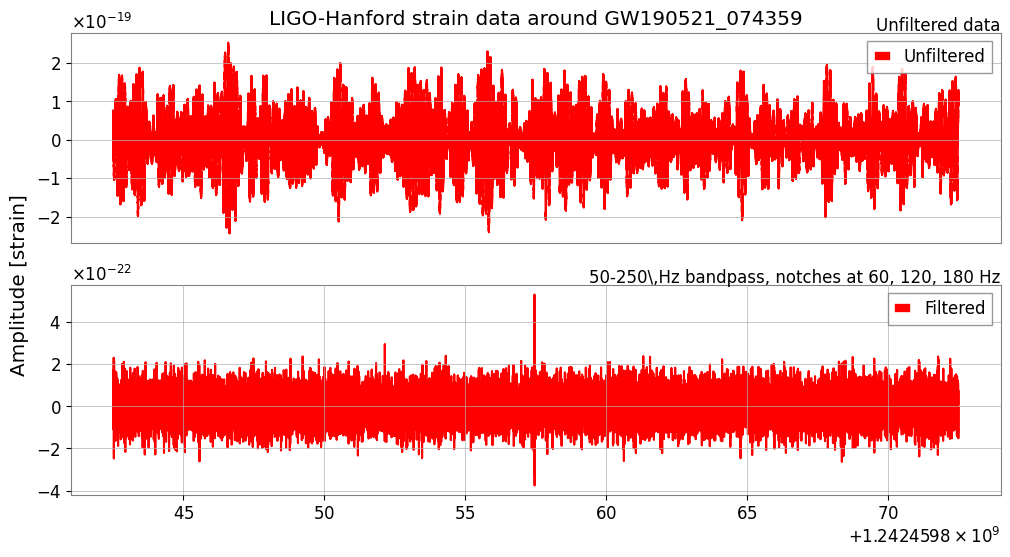

In [9]:
plt.figure(figsize=[12, 6]) # plot size
ax1 = plt.subplot(2, 1, 1) # set plot location
ax1.plot(hdata.times.value, hdata.value, color="red", label="Unfiltered") # plotting the original data
plt.legend()  # legend
ax1.set_title('LIGO-Hanford strain data around GW190521_074359') # plot title
ax1.text(1.0, 1.01, 'Unfiltered data', transform=ax1.transAxes, ha='right') # add annotation
ax1.xaxis.set_visible(False) # hide x-axis
ax2 = plt.subplot(2, 1, 2)  # set plot location
ax2.plot(hfilt.times.value, hfilt.value, color="red", label="Filtered") # plotting the filtered data
ax1.set_ylabel('Amplitude [strain]', y=-0.2)  # y label
ax2.set_ylabel('')
ax2.text(1.0, 1.01, r'50-250\,Hz bandpass, notches at 60, 120, 180 Hz',
         transform=ax2.transAxes, ha='right') # add annotation
plt.legend() # legend


In [10]:
hdata.value # data

array([7.20476099e-20, 7.04515134e-20, 7.26955801e-20, ...,
       1.24084115e-19, 1.15676486e-19, 1.09330862e-19])

Line2D(_child0)


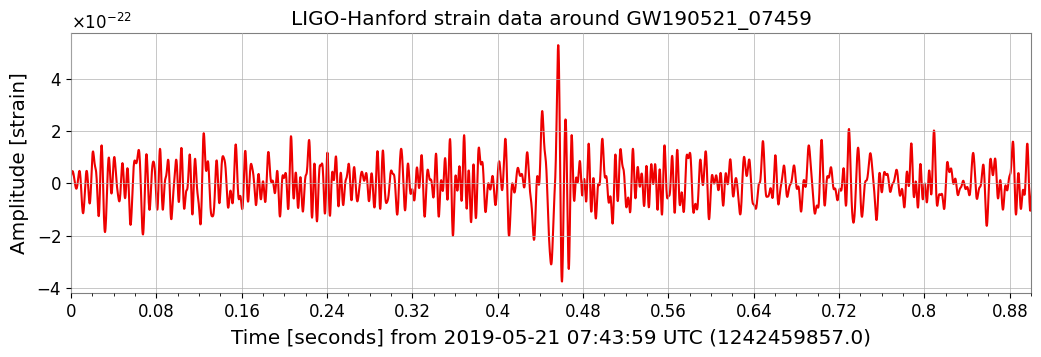

In [25]:
import matplotlib.pyplot as plt # import library for plot

plot = hfilt.plot(color='gwpy:ligo-hanford') # assign a plot with filtered data
ax = plot.gca() # assing axes
ax.set_title('LIGO-Hanford strain data around GW190521_07459') # plot title
ax.set_ylabel('Amplitude [strain]') # y label
ax.set_xlim(1242459857, 1242459857.9) # x domain
ax.set_xscale('seconds', epoch=1242459857) # set x axis scale
plot.show() # display

x_val = plt.gca().lines[0].get_xdata() # assign x values from plot
y_val = plt.gca().lines[0].get_ydata() # assing y values from plot

In [26]:
ldata = TimeSeries.fetch_open_data('L1', t0 - 16, t0 + 16) # data from Livingston
lfilt = ldata.filter(zpk, filtfilt=True) # filter data

In [28]:
lfilt.shift('6.9ms') # modify time data
lfilt *= -1 # invert data

TimeSeries([-3.84852131e-21, -3.75906358e-21, -3.66477045e-21,
            ..., -1.13126006e-22,  8.47831636e-24,
             1.33883179e-22]
           unit: dimensionless,
           t0: 1242459841.5069 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)
TimeSeries([ 3.84852131e-21,  3.75906358e-21,  3.66477045e-21,
            ...,  1.13126006e-22, -8.47831636e-24,
            -1.33883179e-22]
           unit: dimensionless,
           t0: 1242459841.5138001 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


In [14]:
print(0.0069 * 3e8) # 6.9ms x speed of light

2070000.0


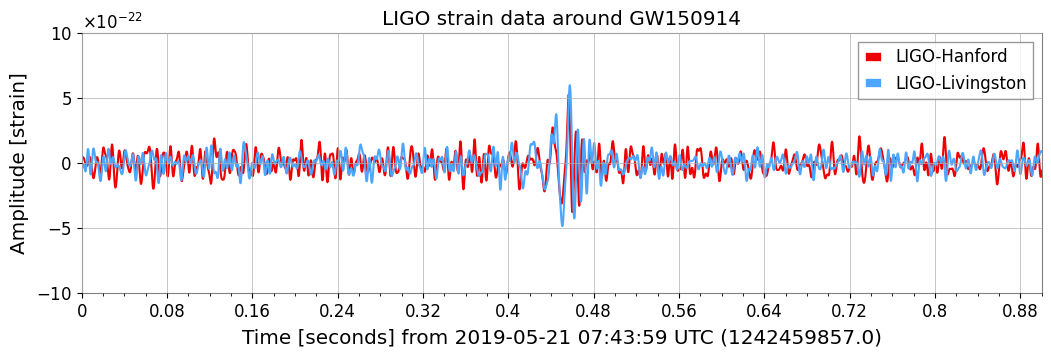

In [15]:
plot = Plot(figsize=[12, 4]) # plot size
ax = plot.gca() # plot axes
ax.plot(hfilt, label='LIGO-Hanford', color='gwpy:ligo-hanford') # plot with filtered data from Hanford
ax.plot(lfilt, label='LIGO-Livingston', color='gwpy:ligo-livingston') # plot with filtered data from Livingston
ax.set_title('LIGO strain data around GW150914') # plot title
ax.set_xlim(1242459857, 1242459857.9) # x domain
ax.set_xscale('seconds', epoch=1242459857) # set x axis scale
ax.set_ylabel('Amplitude [strain]') # y label
ax.set_ylim(-1e-21, 1e-21) # y range
ax.legend() # legend
plot.show() # display

https://colab.research.google.com/github/losc-tutorial/quickview/blob/master/index.ipynb
Also from: https://gwpy.github.io/docs/stable/examples/signal/qscan/

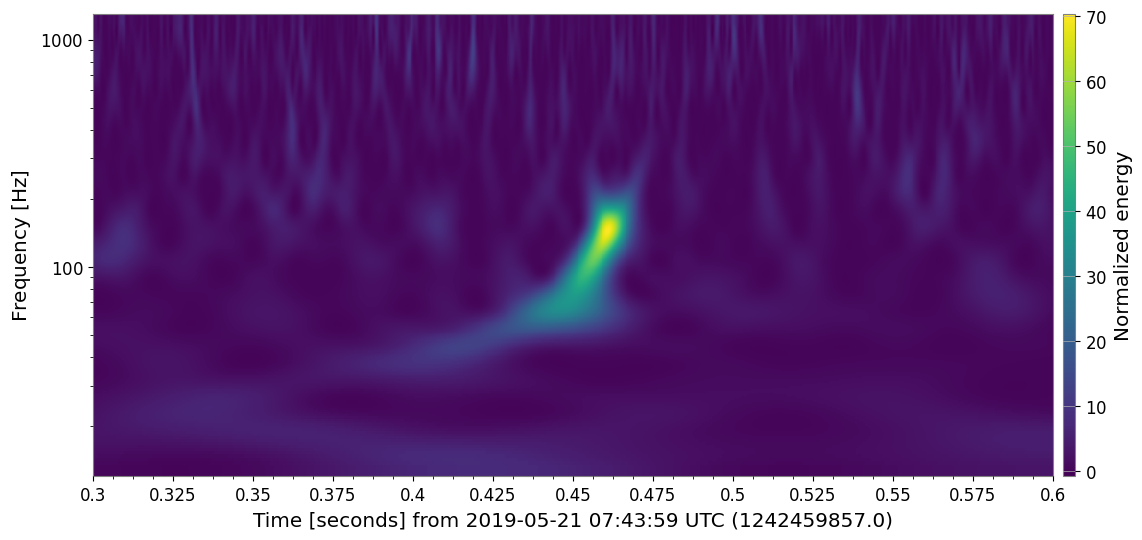

In [16]:
dt = 0.2  #-- Set width of q-transform plot, in seconds
hq = hfilt.q_transform(outseg=(t0-dt, t0+0.1)) # create spectogram
fig4 = hq.plot() # plot
ax = fig4.gca() # axes
fig4.colorbar(label="Normalized energy") # y label
ax.grid(False) # hide grid
ax.set_yscale('log') # tale logarithm

In [17]:
from scipy.io.wavfile import write # import library to make a file
import numpy as np # import library to calculation

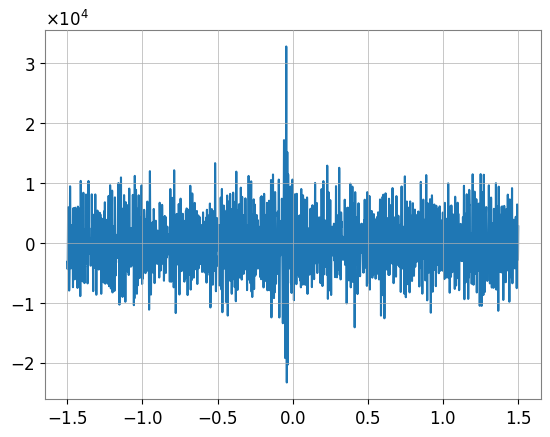

In [18]:
amplitude = np.iinfo(np.int16).max # get amplitude value

ind = np.where((x_val < (t0+1.5)) & (x_val > (t0-1.5))) # find indices where x in the domain
y = y_val[ind] # assign corresponding y values
# y = y**3
y = y / np.max(y) # modify y values
plt.plot(x_val[ind] - t0, (np.array(y) * amplitude).astype(np.int16)) # plotting to compare amplitude size

In [29]:
fs = int(1 / np.median(np.diff(np.array(x_val[ind] - t0)))) # calculate approximate amplitude
print("fs = ", fs) # print fs value
write("example.wav", fs, (np.array(y) * amplitude).astype(np.int16)) # create a file

fs =  4096


In [20]:
from google.colab import files # import library to download file
files.download("example.wav") # download audio file

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>